In [1]:
import io
import sys

    
def replace_bad_character(line):
    return line.strip().replace(u"\u202a", "").replace(u"\u200e", "").replace(u"\u202c", "").replace(u"\xa0", " ")

try: 
    filepath = raw_input("Please input the chat filepath:")
except NameError:
    filepath = input("Please input chat filepath:")

try:
    with io.open(filepath, "r", encoding="utf-8") as file:
        content = [replace_bad_character(l) for l in file.readlines()]
    
except IOError as e:
    print("File \"" + filepath + "\" not found. Please recheck your file location")
    sys.exit()

common_words = []
cw_filepath = ""

cw_option = "Please select common word file or leave it blank to escape: \n\
    1: Indonesian (id_cw.py)\n\
    2: English (en_cw.py)\n\
    3: Spanish (es_cw.py)\n\
    4: Custom file\n\
    5: Skip common word\n"
try: 
    cw = raw_input(cw_option)
except NameError:
    cw = input(cw_option)
    
if cw == "1":
    cw_filepath = "id_cw"
elif cw == "2":
    cw_filepath = "en_cw"
elif cw == "3":
    cw_filepath = "es_cw"
elif cw == "4":
    """
    Prompt user to input the file path
    """
    try: 
        cw_filepath = raw_input("Please input your common word filepath")
    except NameError:
        cw_filepath = input("Please input your common word filepath")


if len(cw_filepath) > 0:

    try:
        common_words = __import__(cw_filepath, globals(), locals(), [common_words]).common_words
        
    except:
        print("Error getting common word file location")
        sys.exit()
else:
    print("You skipped common word.")

try: 
    verbose = raw_input("You wanna print the verbose mode? y/[N]: ") == "y" or False
except NameError:
    verbose = input("You wanna print the verbose mode? y/[N]: ") == "y" or False


Please input chat filepath: clase.txt
Please select common word file or leave it blank to escape: 
    1: Indonesian (id_cw.py)
    2: English (en_cw.py)
    3: Spanish (es_cw.py)
    4: Custom file
    5: Skip common word
 3
You wanna print the verbose mode? y/[N]:  


In [2]:
from sentiment_analysis_spanish import sentiment_analysis
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

import spacy
# Spacy Spanish lemmatizer
nlp = spacy.load("es_core_news_sm")

def getWordNetPos(pos):
    # Tag selector (keep or delete a word based on the syntactic analyser)
    # Input: [String] Tag #Tag given to a word by the syntactic analyzer
    # Output: [Bool] Valid_Element # True if the syntax element is valid
    if pos.startswith('VERB') :
        return True
    elif pos.startswith('PROPN'):
        return True
    elif pos.startswith('NUM'):
        return True
    elif pos.startswith('ADJ'):
        return True
    elif pos.startswith('NOUN'):
        return True
    else: #not_desired = ['ADP','ADV','AUX','CONJ','CCONJ','DET','INTJ','PART','PRON','PUNCT','SCONJ','SYM','X','SPACE']
        return False
    
def cleaner(line):
    # Line filtering: Selects only words that have syntactic value.
    # Input: [String] Line # Text line that it is going to be simplified
    # Output: [String] Clean_line # Tokenized line lemmatized and with no stopwords/punctuation
    line_tagged = nlp(line)
    tokens = [tok.lemma_.lower().replace('á','a').replace('é','e').replace('í','i').replace('ó','o').replace('ú','u') for tok in line_tagged if getWordNetPos(tok.tag_)] #or str(tok) in ['no','y','o']
    return tokens


In [3]:
import re
import errno
import pandas as pd
import emoji
from collections import Counter
from dateutil import parser
import operator
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline


class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
"""
Global vars
"""
insultos = 'a mierda a joder 1. Abanto 2. Abrazafarolas 3. Adufe 4. Alcornoque 5. Alfeñique 6. Andurriasmo 7. Arrastracueros 8. Artabán 9. Atarre 10. Baboso 11. Barrabás 12. Barriobajero 13. Bebecharcos 14. Bellaco 15. Belloto 16. Berzotas 17. Besugo 18. Bobalicón 19. Bocabuzón 20. Bocachancla 21. Bocallanta 22. Boquimuelle 23. Borrico 24. Botarate 25. Brasas 26. Cabestro 27. Cabezaalberca 28. Cabezabuque 29. Cachibache 30. Cafre 31. Cagalindes 32. Cagarruta 33. Calambuco 34. Calamidad 35. Caldúo 36. Calientahielos 37. Calzamonas 38. Cansalmas 39. Cantamañanas 40. Capullo 41. Caracaballo 42. Caracartón 43. Caraculo 44. Caraflema 45. Carajaula 46. Carajote 47. Carapapa 48. Carapijo 49. Cazurro 50. Cebollino 51. Cenizo 52. Cenutrio 53. Ceporro 54. Cernícalo 55. Charrán 56. Chiquilicuatre 57. Chirimbaina 58. Chupacables 59. Chupasangre 60. Chupóptero 61. Cierrabares 62. Cipote 63. Comebolsas 64. Comechapas 65. Comeflores 66. Comestacas 67. Cretino 68. Cuerpoescombro 69. Culopollo 70. Descerebrado 71. Desgarracalzas 72. Dondiego 73. Donnadie 74. Echacantos 75. Ejarramantas 76. Energúmeno 77. Esbaratabailes 78. Escolimoso 79. Escornacabras 80. Estulto 81. Fanfosquero 82. Fantoche 83. Fariseo 84. Filimincias 85. Foligoso 86. Fulastre 87. Ganapán 88. Ganapio 89. Gandúl 90. Gañán 91. Gaznápiro 92. Gilipuertas 93. Giraesquinas 94. Gorrino 95. Gorrumino 96. Guitarro 97. Gurriato 98. Habahelá 99. Huelegateras 100. Huevón 101. Lamecharcos 102. Lameculos 103. Lameplatos 104. Lechuguino 105. Lerdo 106. Letrín 107. Lloramigas 108. Longanizas 109. Lumbreras 110. Maganto 111. Majadero 112. Malasangre 113. Malasombra 114. Malparido 115. Mameluco 116. Mamporrero 117. Manegueta 118. Mangarrán 119. Mangurrián 120. Mastuerzo 121. Matacandiles 122. Meapilas 123. Melón 124. Mendrugo 125. Mentecato 126. Mequetrefe 127. Merluzo 128. Metemuertos 129. Metijaco 130. Mindundi 131. Morlaco 132. Morroestufa 133. Muerdesartenes 134. Orate 135. Ovejo 136. Pagafantas 137. Palurdo 138. Pamplinas 139. Panarra 140. Panoli 141. Papafrita 142. Papanatas 143. Papirote 144. Paquete 145. Pardillo 146. Parguela 147. Pasmarote 148. Pasmasuegras 149. Pataliebre 150. Patán 151. Pavitonto 152. Pazguato 153. Pecholata 154. Pedorro 155. Peinabombillas 156. Peinaovejas 157. Pelagallos 158. Pelagambas 159. Pelagatos 160. Pelatigres 161. Pelazarzas 162. Pelele 163. Pelma 164. Percebe 165. Perrocostra 166. Perroflauta 167. Peterete 168. Petimetre 169. Picapleitos 170. Pichabrava 171. Pillavispas 172. Piltrafa 173. Pinchauvas 174. Pintamonas 175. Piojoso 176. Pitañoso 177. Pitofloro 178. Plomo 179. Pocasluces 180. Pollopera 181. Quitahipos 182. Rastrapajo 183. Rebañasandías 184. Revientabaules 185. Ríeleches 186. Robaperas 187. Sabandija 188. Sacamuelas 189. Sanguijuela 190. Sinentraero 191. Sinsustancia 192. Sonajas 193. Sonso 194. Soplagaitas 195. Soplaguindas 196. Sosco 197. Tagarote 198. Tarado 199. Tarugo 200. Tiralevitas 201. Tocapelotas 202. Tocho 203. Tolai 204. Tontaco 205. Tontucio 206. Tordo 207. Tragaldabas 208. Tuercebotas 209. Tunante 210. Zamacuco 211. Zambombo 212. Zampabollos 213. Zamugo 214. Zángano 215. Zarrapastroso 216. Zascandil 217. Zopenco 218. Zoquete 219. Zote 220. Zullenco 221. Zurcefrenillos a gilipollas a imbécil a hijoputa a hijaputa l cabrón a cabrona a subnormal a imbécil a puto a puta a perra a mamon a tonto a mongol a mongolo a ramera a bobo a prostituto a prostituta a gordo a gorda a cerdo a cerda'
insultos = insultos.split(' ')
insultos = [insultos[i].lower().replace('á','a').replace('é','e').replace('í','i').replace('ó','o').replace('ú','u') for i in range(len(insultos)) if i%2 != 0]
chat_of_members = {}
member_chat = {"member": [], "chat_count": []}
member_sentiment = {}
attachments = {}
refered_web = {"domain": [], "d_count": []}
popular_words = {}
insults = dict.fromkeys(insultos,0)
chat_words = ""
insult_words = ""
emojis = {"emj_char": [], "char_count": []}
heat_map = {
    "day": [], 
    "hour": [], 
    "chat_count": []
}
deleted_message = 0
pure_chat = ""
total_chat = 0

"""
Starting line mean a line that started with date time.
Because there are multiline chat. I called it following line.
A starting line must be classified before it's data being extracted.
"""
def is_starting_line(line):
    pattern = r"""
        (\[?)       #Zero or one open square bracket '['
        (((\d{1,2})   #1 to 2 digit date
        (/|-)       #'/' or '-' separator
        (\d{1,2})   #1 to 2 digit month
        (/|-)       #'/' or '-' separator
        (\d{2,4}))   #2 to 4 digit of year
        (,?\s)      #Zero or one comma ',' and ingle space
        ((\d{1,2})  #1 to 2 digit of hour
        (:|\.)      #Colon ':' or dot '.' separator
        (\d{2})     #2 digit of minute
        (\.|:)?     #Zero or one of dot '.' or colon ':'
        (\d{2})?    #Zero or one of 2 digits of second
        (\s[AP]M)?))  #Zero or one of ('space', 'A' or 'P', and 'M'
        (\]?\s-?\s?\s?)#Zero or one close square bracket ']', Zero or one (space and '-'), zero or one space
        (.+)        #One or more character of chat member phone number or contact name
    """
    
    return re.match(re.compile(pattern, re.VERBOSE), line)

"""
"Is Chat" means the body of a line is not an event.
May contains attachment
"""
def is_chat(body):
    pattern = r"""
            ([^:]+)#Chat member
            (:)   #Colon separator
            (.+)  #One or more charachter of message content
    """
    
    return re.match(re.compile(pattern, re.VERBOSE), body)

"""
Classify attachment
Note: in Android, there is no proper description wether it's a image, 
      video, audio, gif, or sticker.
"""
def contains_attachment(body):
    pattern_attachment = [
        ".*<Media omitted>$", #English version of android attachment
        ".*<Multimedia omitido>$", #Spanish version of android attachment
        ".*<Media tidak disertakan>$", #Indonesia version of android attachment
        ".*Pesan tidak didukung$", #Some device not recognize sticker attachment
        ".+\.vcf \(file\sterlampir\)$", #Indonesian version of android contact card,
        ".+\.vcf \(file\sattached\)$", #Indonesian version of android contact card,
        ".*image omitted$",
        ".*video omitted$",
        ".*document omitted$",
        ".*Contact card omitted$",
        ".*audio omitted$",
        ".*GIF omitted$",
        ".*sticker omitted$"
    ]
    
    for p in pattern_attachment:
        match = re.match(p, body)
        if match:
            return body
    return None

"""
Event means logs of chat activity e.g member left, member added, removed, etc.
This kind of line can not count as a chat
"""
def is_event(body):
    pattern_event = [
        "Messages to this group are now secured with end-to-end encryption\.$",
        ".+\screated this group$",
        ".+\skeluar$",
        ".+\sleft$",
        ".+\stelah bergabung menggunakan tautan undangan grup ini$",
        ".+\smenambahkan\s.+",
        ".+\sadded\s.+",
        ".+\sremoved\s.+",
        ".*You joined using this group's invite links$",
        ".+'s security code changed\.$",
        ".*telah mengganti nomor teleponnya ke nomor baru. Ketuk untuk mengirim pesan atau menambahkan nomor baru\.$",
        ".*changed their phone number to a new number. Tap to message or add the new number\.$"
    ]
    
    for p in pattern_event:
        match = re.match(p, body)
        if match:
            return match
    return None
"""
Deleted message
"""
def is_deleted(body):
    p = [
        ".*This message was deleted\.$",
        ".*Eliminaste este mensaje\.$",
        ".*Este mensaje fue eliminado\.$",
        ".*Pesan ini telah dihapus$"
    ]
    
    for p in p:
        match = re.match(p, body)
        if match:
            return body
    return None

"""
EXTRACT TIMESTAMP
"""
def extract_timestamp(time_string):
    return parser.parse(time_string)

"""
Check if chat contais a url
"""
def extract_url(body):
    pattern = "https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+"
    
    return re.findall(pattern, body)

def get_domain(str):
    domain = str.replace("http://", '')
    domain = domain.replace("https://", '')
    domain = domain.split("/")
    return domain[0]

"""
EMOJI
"""
def extract_emojis(string):
    emj = []
    for c in string:
        if c in emoji.UNICODE_EMOJI:
            emj.append(c)

    if len(emj) > 0:
        increment_emoji_count(emj)
    
    return emj

"""
Count top words
"""
def get_words(msg):
    
    #remove non alpha content
    regex = re.sub(r"[^a-z\s]+", "", msg.lower())
    regex = re.sub(r'[^\x00-\x7f]',r'', regex)
    #~ESTO LO HEMOS PUESTO NOSOTROS
    words = cleaner(regex) 
    
    for x in words:
        if x:
            rank_word(x)
            
    return words

def rank_word(word):
    
    if not word in common_words:
        popular_words[word] = popular_words.get(word, 0) + 1
        global chat_words
        chat_words += " {0}".format(word)
        
    return word


"""
Insults
"""
def get_insults(msg):
    #remove non alpha content
    regex = re.sub(r"[^a-z\s]+", "", msg.lower())
    regex = re.sub(r'[^\x00-\x7f]',r'', regex)
    #~ESTO LO HEMOS PUESTO NOSOTROS
    words = cleaner(regex) 
    for i in insultos:   
        if i in words:
            insults[i] = insults[i] + 1 
            global insult_words
            insult_words += " {0}".format(i)
    return None



"""
Sentiment
"""
def get_sentiment(msg,member):
    #remove non alpha content
    regex = re.sub(r"[^a-z\s]+", "", msg.lower())
    regex = re.sub(r'[^\x00-\x7f]',r'', regex)
    sent_value = sentiment.sentiment(regex) * 2
    try:
        member_sentiment[member][0] += sent_value
        member_sentiment[member][1] += 1
    except:
        member_sentiment[member] = [sent_value, 1]

"""
Counting function
"""

"""
Rank the 'Most Active user'
"""        
def increment_chat_count(member):
    member_chat["member"].append(member)
    member_chat["chat_count"].append(1)
    global total_chat
    total_chat += 1
    
    return member
 
def increment_attachment_count(message):
    
    if "Multimedia omitido" in message:
        attachments["image"] = attachments.get("image", 0) +1
        return
    
    if "image omitted" in message:
        attachments["image"] = attachments.get("image", 0) +1
        return
        
    if "video omitted" in message:
        attachments["video"] = attachments.get("video", 0) +1
        return
    
    if "audio omitted" in message:
        attachments["audio"] = attachments.get("audio", 0) +1
        return
    
    if "document omitted" in message:
        attachments["document"] = attachments.get("document", 0) +1
        return
    
    if "Contact card omitted" in message or ".vcf" in message:
        attachments["contact"] = attachments.get("contact", 0) +1
        return
    
    if "GIF omitted" in message:
        attachments["gif"] = attachments.get("gif", 0) +1
        return
    
    if "sticker omitted" in message:
        attachments["sticker"] = attachments.get("sticker", 0) +1
        return
    
    ##Unknown attachment
    attachments["unknown"] = attachments.get("unknown", 0) +1

    

def increment_link_count(urls):
    for url in urls:
        increment_domain_count(get_domain(url))
                    
    return len(urls)
    
def increment_domain_count(domain):
    refered_web["domain"].append(domain)
    refered_web["d_count"].append(1)

def increment_emoji_count(char_list):
    groups = Counter(char_list)
    for c in groups.items():
        emojis["emj_char"].append(c[0])
        emojis["char_count"].append(c[1])
        
def increment_heatmap(dt):
    heat_map["day"].append(dt.strftime("%A"))
    heat_map["hour"].append(dt.strftime("%H"))
    heat_map["chat_count"].append(1)

def increment_deleted():
    global deleted_message
    deleted_message += 1
"""
Self explained
"""
def parse_line(line, verbose):
    prefix = ""
    is_starting = is_starting_line(line)
    if is_starting:
        #Check wether the starting line is a chat or an event
        body = is_starting.group(18)
        chat = is_chat(body)
        dt = extract_timestamp(is_starting.group(2).replace(".", ":"))
        increment_heatmap(dt)
        
        if chat:
            has_attachment = contains_attachment(chat.group(3))
            increment_chat_count(chat.group(1))
            message_body = chat.group(3)
            
            if has_attachment:
                prefix = "@@@" 
                increment_attachment_count(has_attachment)
                
                if verbose: print(bcolors.OKBLUE + bcolors.HEADER + prefix + line)
                
            else:
                if is_deleted(message_body):
                    increment_deleted()
                else:
                    prefix = "+++"
                    
                    #URL & Domain
                    urls = extract_url(message_body)
                    if urls:
                        increment_link_count(urls)

                    #Emoji
                    emjs = extract_emojis(message_body)
                    
                    #Word Count & Wordcloud
                    get_words(message_body)
                    get_insults(message_body)
                    get_sentiment(message_body,chat.group(1))
                    if verbose: print(bcolors.OKGREEN + bcolors.HEADER + prefix + line)
                
        elif is_event(body):
            prefix = "***"
                
            if verbose: print(bcolors.WARNING + prefix + line)
        
    else:
        prefix = "|||"
        
        #URL & Domain
        urls = extract_url(line)
        if urls:
            increment_link_count(urls)
        
        #Emoji    
        emjs = extract_emojis(line)
        
        #Word Count & Wordcloud
        get_words(line)
        
        get_insults(line)

        if verbose: print(bcolors.FAIL + prefix + line)

print("Extracting data. Please wait....")

for line in content:
    parse_line(line, verbose)
    
print("Done. You can run next cell.")

Extracting data. Please wait....
Done. You can run next cell.


In [4]:
"""
DataFrame
"""
chat_per_member = (pd.DataFrame(member_chat)
                     .groupby(["member"])
                     .sum()
                     .sort_values(by = ['chat_count'], ascending=False))

sentiment_users = member_sentiment.keys()
sentiment_values = member_sentiment.values()

sentiment_ratings = [round(sent[0]/sent[1],3) for sent in sentiment_values]

sent_per_member = (pd.DataFrame(list(zip(sentiment_users, sentiment_ratings)), columns =['User', 'Ratings'])
                     .sort_values(by = ['Ratings'], ascending=True)).set_index('User')

popular_words_df = sorted(popular_words.items(), key=operator.itemgetter(1), reverse=True)
insults_df = sorted(insults.items(), key=operator.itemgetter(1), reverse=True)
domains = (pd.DataFrame(refered_web)
                     .groupby(["domain"])
                     .sum()
                     .sort_values(by = ['d_count'], ascending=False))
emojis_df = (pd.DataFrame(emojis)
                     .groupby(["emj_char"])
                     .sum()
                     .sort_values(by = ['char_count'], ascending=False))
top_repeated_emoji = (pd.DataFrame(emojis)
                     .sort_values(by = ['char_count'], ascending=False))
heatmap_df = pd.DataFrame(heat_map)
grouped_heatmap = heatmap_df.groupby(["day", "hour"]).sum().sort_values(by=["chat_count"], ascending=False)
pivoted_heatmap = pd.pivot_table(grouped_heatmap, values='chat_count', index=['day'], columns=['hour'])

print("Done. You can run next cell.")

Done. You can run next cell.


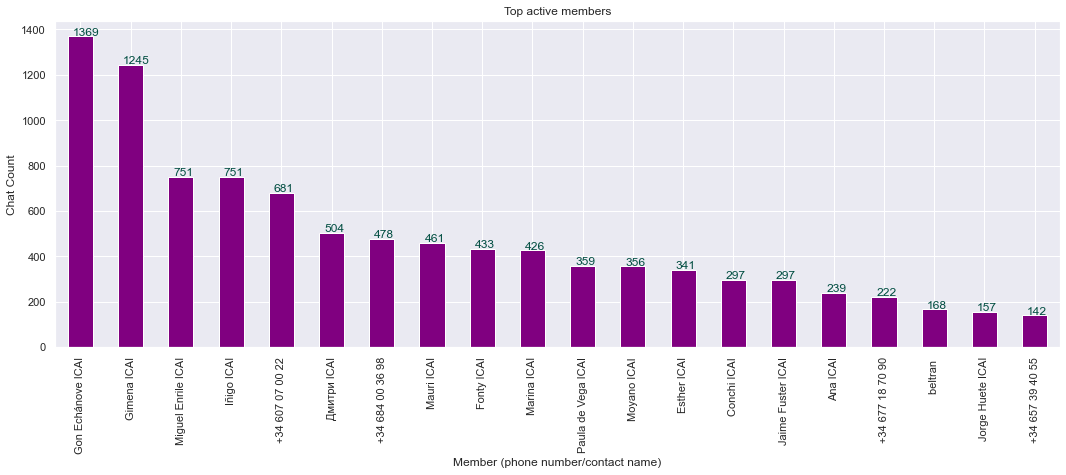

In [5]:
"""
Top Member Chat
"""
top_member = chat_per_member.head(20)
if not top_member.empty:
    sns.set()
    member_plot = top_member.plot(kind='bar', legend=None, title="Top active members", figsize=(18, 6), color="purple")
    member_plot.set_xlabel("Member (phone number/contact name)")
    member_plot.set_ylabel("Chat Count")
    for i, v in enumerate(top_member["chat_count"]):
        member_plot.text(i - .15, v + 3, v, color="#004d40")
else:
    print("This chat has no member")

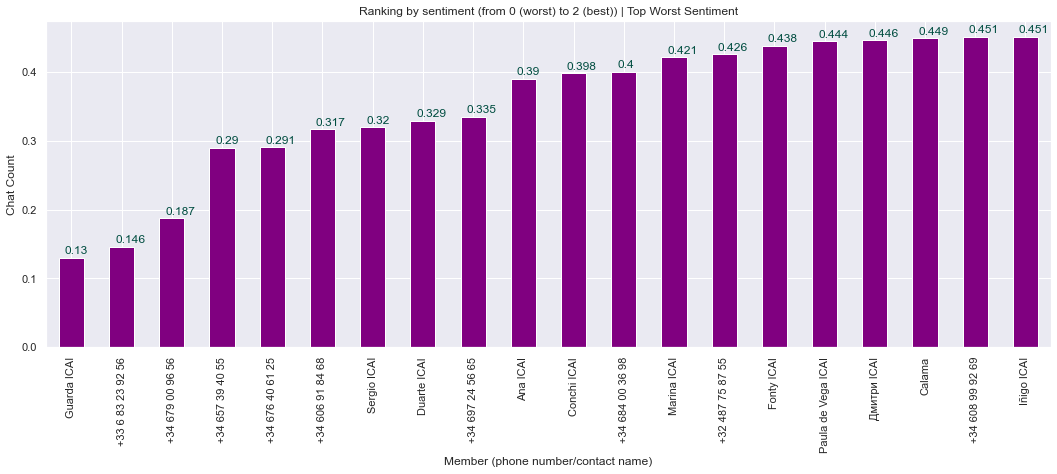

In [6]:
"""
Top Sentiment
"""
top_sent = sent_per_member.head(20)
if not top_member.empty:
    sns.set()
    member_plot = top_sent.plot(kind='bar', legend=None, title="Ranking by sentiment (from 0 (worst) to 2 (best)) | Top Worst Sentiment", figsize=(18, 6), color="purple")
    member_plot.set_xlabel("Member (phone number/contact name)")
    member_plot.set_ylabel("Chat Count")
    for i, v in enumerate(top_sent["Ratings"]):
        member_plot.text(i - .13, v+0.005, v, color="#004d40")
else:
    print("This chat has no member")

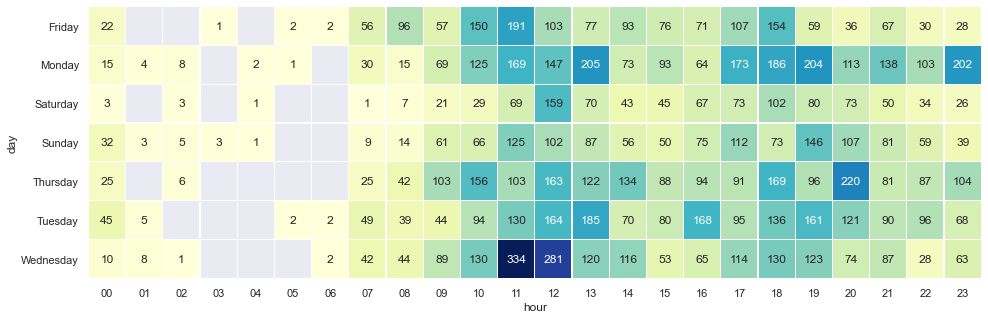

In [7]:
"""
Heatmap
"""
heatmap_df = pd.DataFrame(heat_map)
if not heatmap_df.empty:
    grouped_heatmap = heatmap_df.groupby(["day", "hour"]).sum().sort_values(by=["chat_count"], ascending=False)
    pivoted_heatmap = pd.pivot_table(grouped_heatmap, values='chat_count', index=['day'], columns=['hour'])
    plt.figure(figsize = (16,5))
    sns.heatmap(pivoted_heatmap, 
                annot=True, 
                fmt=".0f", 
                linewidths=.2,
                cmap="YlGnBu",
                cbar=False
               )
else:
    print("This chat does not contain any datetime")

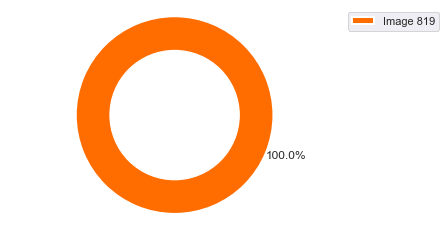

In [8]:
s_attachments = sorted(attachments.items(), key = operator.itemgetter(1), reverse=True)
if s_attachments:
    at_labels = [x[0].title() + " " + str(x[1]) for x in s_attachments]

    at_explode = tuple([0 + i * 0.1 for i in range(len(s_attachments))])
    at_sizes = [x[1] for x in s_attachments]
    at_colors = ["#FF6D00", "#64DD17", "#00B8D4", "#304FFE", "#AA00FF", "#d50000", "#546E7A", "#dddddd"]
    at_pie = plt.pie(at_sizes,  
             autopct='%1.1f%%',
             explode=at_explode,
             pctdistance=1.2,
             colors=at_colors,
             startangle=160,
             radius=1.3,
             wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
    )

    at_centre_circle = plt.Circle((0,0),0.85,color='white', fc='white',linewidth=1.25)
    at_fig = plt.gcf()
    at_fig.gca().add_artist(at_centre_circle)

    plt.legend(
        loc='upper left',
        labels=at_labels,
        prop={'size': 11},
        bbox_to_anchor=(1, 1)
    )
    at_axis = plt.axis('equal')
else:
    print("This chat contains no attachment.")

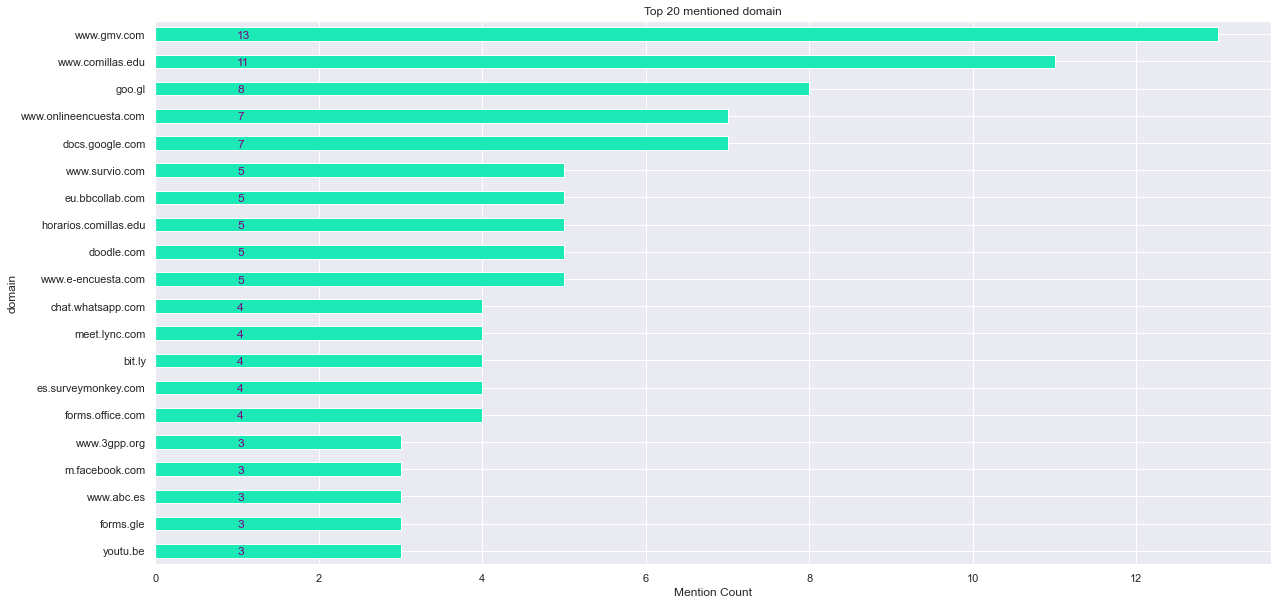

In [9]:
"""
Top Website
"""
top_web = domains.head(20).sort_values("d_count")
if not top_web.empty:
    mpl.rc('font', **{'sans-serif' : 'arial', 'family' : 'sans-serif'})
    web_plot = top_web.plot(kind='barh', legend=None, title="Top 20 mentioned domain", figsize=(20,10), color="#1de9b6")
    web_plot.set_xlabel("Mention Count")
    for i, v in enumerate(top_web["d_count"]):
        web_plot.text(1, i - .15, v, color="purple")
else:
    print("This chat not contains any link")

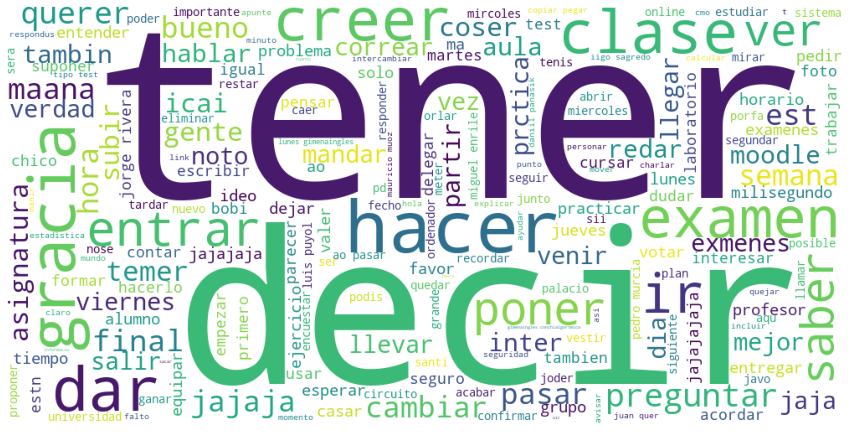

In [10]:
"""
Wordcloud
"""
if chat_words:
    wordcloud = WordCloud(
        width = 1000, 
        height = 500,
        background_color = "white"
    ).generate(chat_words)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
else:
    print("This chat contains no word")

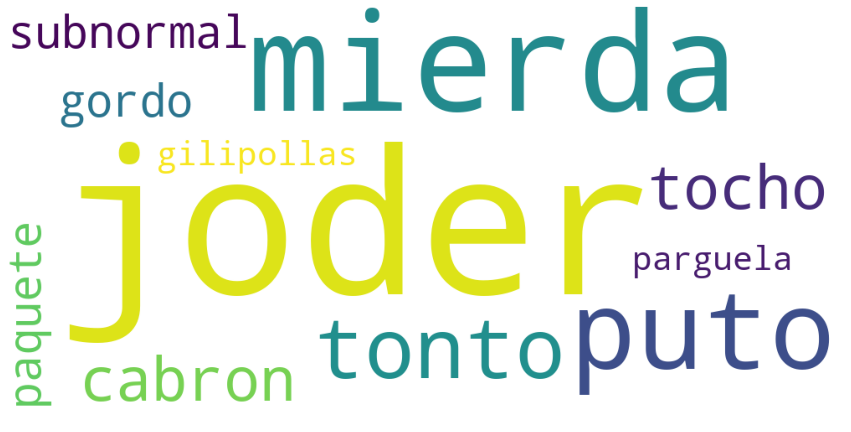

In [11]:
"""
Wordcloud
"""
if insult_words:
    wordcloud = WordCloud(
        width = 1000, 
        height = 500,
        background_color = "white"
    ).generate(insult_words)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
else:
    print("This chat contains no word")

In [12]:
"""
Raw Output
"""
print("\n=======================================\n")
print("#Total Chat: {0}".format(total_chat))
print("#Deleted Message: {0}".format(deleted_message))
print("#Total Attachment: {0}".format(sum([x[1] for x in s_attachments])))
for a in s_attachments:
    print("  - : {0}".format(a))
    


print("\n#Top Member")
print("-----------------")
print(top_member)

print("\n#Top Member by sent")
print("-----------------")
print(top_sent)


print("\n#Top 20 Words")
print("-----------------")
for k, v in enumerate(popular_words_df):
    if k < 20:
        print(v)
    else:
        break
        

print("\n#Top 20 Insults")
print("-----------------")        
for k, v in enumerate(insults_df):
    if k < 20:
        print(v)
    else:
        break
        
print("\n#Top 20 Emoji")
print("-----------------")
print(emojis_df.head(20))

print("\n#Top 20 Mentioned Website")
print("-----------------")
print(top_web.sort_values("d_count", ascending=False))



#Total Chat: 11418
#Deleted Message: 0
#Total Attachment: 819
  - : ('image', 819)

#Top Member
-----------------
                    chat_count
member                        
Gon Echánove ICAI         1369
Gimena ICAI               1245
Miguel Enrile ICAI         751
Iñigo ICAI                 751
+34 607 07 00 22           681
Дмитри ICAI                504
+34 684 00 36 98           478
Mauri ICAI                 461
Fonty ICAI                 433
Marina ICAI                426
Paula de Vega ICAI         359
Moyano ICAI                356
Esther ICAI                341
Conchi ICAI                297
Jaime Fuster ICAI          297
Ana ICAI                   239
+34 677 18 70 90           222
beltran                    168
Jorge Huete ICAI           157
+34 657 39 40 55           142

#Top Member by sent
-----------------
                    Ratings
User                       
Guarda ICAI           0.130
+33 6 83 23 92 56     0.146
+34 679 00 96 56      0.187
+34 657 39 40 55      0